# CS 254 Assignment 8

Before we start, please put your name in following format:

FirstName Lastname, netid //   e.g.) Safwan Wshah, swshah

To run your code:

*   Save your code to google drive, right click and open using google colab.
*   rename the assigmnent file to Yourfirstname_lastname_Assignment2.ipynb.
*   Under google drive root directory create the following folder and make sure all your assignments are under this directory (CS254/CS254-Assignments/yournetid-A#). For example, for assignment #8 it should look like this 
CS254/CS254-Assignments/swshah-A8



To submit, please follow the following steps:
*   Zip your assignment and name it yournetid-A#.zip For example for assignment 8, it should be swshah-A8.zip.
* Submit to blackboard. 

### Getting started: Installing Numpy, Keras and TensorFlow

In this assignment you will learn how to use a third party open-source toolkit to create and train a Neural Network. In this assignment you will use Keras. Keras is a high-level Python API that allows you to easily construct, train, and apply neural networks. However, Keras is not a neural network library itself and depends on one of several neural network backends/packages. We will use the Tensorflow backend. TensorFlow is an open-source library for neural networks (and other mathematical models based on sequences of matrix and tensor computations), originally developed by Google. Also, Keras uses numpy data structures. 

In the recent tensorflow version 2.0, Google merged Keras in tensorflow. So, if you are using tensorflow version 2.0 or higher there might be a slightly change in the syntax for importing the functions or modules. One good resource is to go to the tensorflow documentation and look for the syntax. The link is https://www.tensorflow.org/guide/effective_tf2. 

Installing Numpy, TensorFlow and Keras: 


### OR Using Anaconda (Easy and Prefered)

- $ conda install tensorflow 

### OR Using PIP 

for this, I assume you are very familir with PIP. On most systems, the following commands should work:

- $ pip install numpy matplotlib.

- $ pip install tensorflow


<b> Note:It is highly recommended that you use tensorflow version 2.0 or higher as this assignment will be following 2.0 version. </b> 


Note that this will likely install the CPU version of TensorFlow that does not use the GPU to speed up neural network training. For this assignment, training on the CPU will be sufficient (and recommended), but if your computer has a GPU (or you want to try running the assignment in the cloud), follow the installation instructions on the tensorflow page. 

If you get stuck during the installation, you can find installation instructions for each package here: 

- Tensorflow: https://www.tensorflow.org/install/ 
- Keras: https://keras.io/#installation 

<b> Note: You don't need to install keras separately if you are using tensorflow version 2.0 or better as it will be in tensorflow. <b>

 <span style="color:red"><b>It is highly recommend that </b> you read and run this tutorial before you start this assignment. </b></span>
- https://www.tensorflow.org/tutorials/keras/classification


In [ ]:
# import needed libraries
from __future__ import absolute_import, division, print_function, unicode_literals

# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import optimizers
# Helper libraries

print(tf.__version__)

2.9.2


Make sure that your tensorflow version is <b>larger</b> than 2.0.0

### Introduction
In this assignment you will use the Keras Neural Network API to build neural networks for <b>image classification</b>. 


### Loading CIFAR-10 Dataset

We will work on the CIFAR-10 image data set described here: https://www.cs.toronto.edu/~kriz/cifar.html.

The data set contains 60,000 images labeled with 10 different categories:

Numeric ID	Category Name
- 0	airplane
- 1	automobile
- 2	bird
- 3	cat
- 4	deer
- 5	dog
- 6	frog
- 7	horse
- 8	ship
- 9	truck

Each image is 32x32 pixels and there are three color channels (red, green blue). Each image can therefore be represented as three 32x32 matrices or one 32x32x3 cube.

In [ ]:
# load the data
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()

In [ ]:
# print data dimensions, note the 3 that indicates three channels (red, green, blue)
xtrain.shape, xtest.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

### Q1  --  [10 pts]
Split the training data into training and validation. Resulting in training, testing and validation (40000 for training,10000 for testing and 10000 for validation). Thus you have xtrain, ytrain, xvalid, yvalid, xtest, and ytest as numpy n-dimension arrays contains the training validation and testing data. 

Hint: 
- You already have test/train split, you only need to spli training into train and validation.
- Use train_test_split sklearn function to split the training data into training and validation.

The input training data (xtrain) is a 4-dimensional array containing 40000 images, each of them a 32x32x3 tensor. Numpy arrays can be indexed like nested Python lists, so xtrain[0] will give you the first 32x32x3 image.

The input label (ytrain) is a vector containing the numeric class for each image (see table above for what the numeric IDs mean). For example, if xtrain[0] is an image of a frog and therefore ytrain[0] contains the value 6. 

In [ ]:
from sklearn.model_selection import train_test_split

# This will normalize your data. For images we only need to normalize the data by dividing it
# over 255 thus the pixel normalized intensity range from 0-1.0 
xtrain = xtrain/255
xtest = xtest/255

xtrain, xval, ytrain, yval= train_test_split(xtrain, ytrain, test_size=0.2, random_state=0)

In [ ]:
print ("xtrain.shape is ",xtrain.shape)
print ("xval.shape is ",xval.shape)
print ("xtest.shape is ",xtest.shape)

print ("ytrain.shape is ", ytrain.shape)
print ("yval.shape is ", yval.shape)
print ("ytest.shape is ", ytest.shape)

#Answers should be 
# xtrain.shape is  (40000, 32, 32, 3)
# xval.shape is  (10000, 32, 32, 3)
# xtest.shape is  (10000, 32, 32, 3)
# ytrain.shape is  (40000, 1)
# yval.shape is  (10000, 1)
# ytest.shape is  (10000, 1)

xtrain.shape is  (40000, 32, 32, 3)
xval.shape is  (10000, 32, 32, 3)
xtest.shape is  (10000, 32, 32, 3)
ytrain.shape is  (40000, 1)
yval.shape is  (10000, 1)
ytest.shape is  (10000, 1)


## Visualizing Images
If you want to take a look at the individual images, you can do so using matplotlib 

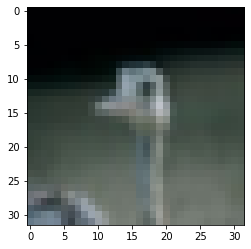

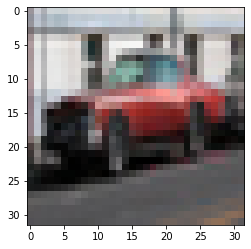

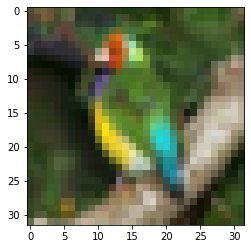

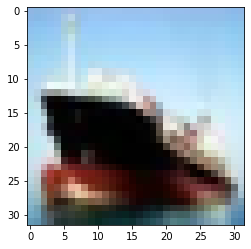

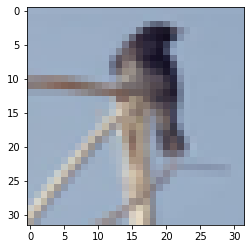

In [ ]:
for _ in range(5):
    plt.imshow(xtrain[np.random.randint(len(xtrain))])
    plt.show()

### Q2  --  [10 pts]

For calssifcaiton, representing the output as 1-hot encoding is the best way to train a fair classifer. The output layer of your neural network will contain 10 neurons corresponding to 10 classes of your dataset. The classifier will then predict the class of the neuron associated with the highest activation. We need to convert the numeric indexes for each image into a 1-hot vector of length 10, so that for class label n the n-th element is 1 and all other elements are 0. For example, if the class label is 6, we should get the 1-hot vector [0 0 0 0 0 1 0 0 0 0].

The class labels for the entire training and test set should then be represented as a 40000x10 matrix, and the testing data as a 10000x10 matrix. 

Write the function mapto1hot(), should map ytrain, yval, ytest to ytrain_1hot, yval_1hot, ytest_1hot. Your function should convert the y arrays into 1-hot representation. You can either do this using loops (slow), using numpy fancy indexing (see numpy documentation), or by using appropriate functions in the numpy or Keras API (to_categorical, https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical). 

In [40]:
def mapto1hot():
  
  ytrain_1hot = tf.keras.utils.to_categorical(ytrain, num_classes=10) # add your code here to map ytrain to ytrain_1hot
  yval_1hot = tf.keras.utils.to_categorical(yval, num_classes=10) # add your code here to map yval to yval_1hot
  ytest_1hot = tf.keras.utils.to_categorical(ytest, num_classes=10) # add your code here to map ytest to ytest_1hot
    
  return ytrain_1hot, yval_1hot, ytest_1hot

In [41]:
ytrain_1hot, yval_1hot, ytest_1hot = mapto1hot()

In [42]:
print (xtrain.shape, ytrain_1hot.shape)
print (xval.shape, yval_1hot.shape)
print (xtest.shape, ytest_1hot.shape)

#your answer should be 
# (40000, 32, 32, 3) (40000, 10)
# (10000, 32, 32, 3) (10000, 10)
# (10000, 32, 32, 3) (10000, 10)

(40000, 32, 32, 3) (40000, 10)
(10000, 32, 32, 3) (10000, 10)
(10000, 32, 32, 3) (10000, 10)


### Q3  --  [20 pts]

In this task, you will implement a MLP network using keras.Sequential method with:

- Batch size: 16. 
- Number of hidden layers: 1 
- Neurons in hidden layers: 100
- Optimizer: SGD
- Learning Rate: 0.01
- Epochs: 10
- Output activation: softmax
- All other activation(s): relu

Keep all other hyperparameters at their default settings.

Find the performance (accuracy) of your model on the validation set and test set after training for 10 epochs. 

In [60]:
layers = [
    Flatten(input_shape=(32, 32, 3)),
    #Add your first layer details here, Example Dense(50, activation="tanh"),
    Dense(100, activation="relu"),
    #Add your second layer details here 
    Dense(10, activation="softmax")
]

model = Sequential(layers)


#refer to https://www.tensorflow.org/tutorials/keras/classification tutorial to check on how to use compile function
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# This will start the training and save each epoch output in the history list.
history = model.fit(xtrain, ytrain_1hot, batch_size=16, epochs=10 , validation_data=(xval, yval_1hot))

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 3072)              0         
                                                                 
 dense_29 (Dense)            (None, 100)               307300    
                                                                 
 dense_30 (Dense)            (None, 10)                1010      
                                                                 
Total params: 308,310
Trainable params: 308,310
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
2500/2500 [==============================] - 13s 5ms/step - loss: 1.8857 - accuracy: 0.3213 - val_loss: 1.7624 - val_accuracy: 0.3786
Epoch 2/10
2500/2500 [==============================] - 12s 5ms/step - loss: 1.7078 - accuracy: 0.3934 - val_loss: 1.6693 - val_accuracy: 0.4094
Epoch 3/10
2500/2500 

### Q4  --  [25 pts]

How many parameters are in the model implemented in Q3, compare your calculations with model.summary() function? Show your calculations in details.

In [59]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 3072)              0         
                                                                 
 dense_27 (Dense)            (None, 100)               307300    
                                                                 
 dense_28 (Dense)            (None, 10)                1010      
                                                                 
Total params: 308,310
Trainable params: 308,310
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#number of paramters = 308,310

### Q5  --  [15 pts] 

Use the code below to plot the perfomance at each epoch. At which epoch does your model starts to overfit? Do you think early stopping would be a good solution to avoid overfitting in this case? Give an explaination.

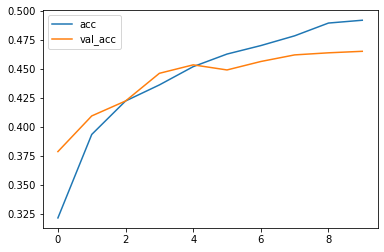

In [62]:
plt.plot(history.history['accuracy'], label="acc")
plt.plot(history.history['val_accuracy'], label="val_acc")
plt.legend()
plt.show()

In [ ]:
#provide your explanation here
# as the epochs progress the val_acc is increasing then flattening out as the actual acc is only going up as this is showing the over fitting this modle will suffer from


### Q6  --  [20 pts] 

In this question, you will evaluate the performance of your network for 2 varying values of hyperparameters. Keeping the rest of the values constant (and equal to the default values), adjust the values of parameters as described below. Find the performance (accuracy) of your model on the validation set and plot a trend graph for each of the following.

Experiment 1:
- Batch size: 32
- Number of hidden layers: 2
- SGD optimizer, Learning Rate: 0.01
- Use 10 epochs for all the experiments
- final activation: softmax
- all other activations: relu



Experiment 2:
- Batch size: 64
- Number of hidden layers: 4
- SGD optimizer, Learning Rate: 0.01
- Use 10 epochs for all the experiments
- final activation: softmax
- all other activations: relu

<b>Compare the results from both settings and comment with details. Is one of them is better than the other. Write your explanation if it is the case.</b>

In [63]:
# add the code of experiment model #1 here
layers2 = [
    Flatten(input_shape=(32, 32, 3)),
    #Add your first layer details here, Example Dense(50, activation="tanh"),
    Dense(100, activation="relu"),
    Dense(100, activation="relu"),
    #Add your second layer details here 
    Dense(10, activation="softmax")
]

model2 = Sequential(layers2)


#refer to https://www.tensorflow.org/tutorials/keras/classification tutorial to check on how to use compile function
model2.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

# This will start the training and save each epoch output in the history list.
history2 = model2.fit(xtrain, ytrain_1hot, batch_size=32, epochs=10 , validation_data=(xval, yval_1hot))

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 3072)              0         
                                                                 
 dense_31 (Dense)            (None, 100)               307300    
                                                                 
 dense_32 (Dense)            (None, 100)               10100     
                                                                 
 dense_33 (Dense)            (None, 10)                1010      
                                                                 
Total params: 318,410
Trainable params: 318,410
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.9239 - accuracy: 0.3068 - val_loss: 1.7983 - val_accuracy: 0.3615
Epoch 2/10
1250/1250 [=============

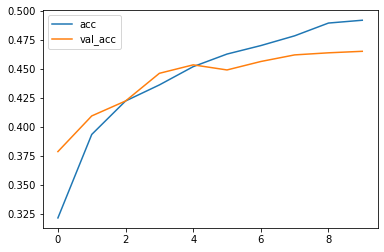

In [64]:
plt.plot(history.history['accuracy'], label="acc")
plt.plot(history.history['val_accuracy'], label="val_acc")
plt.legend()
plt.show()

In [65]:
model.evaluate(xtest, ytest_1hot)

313/313 [==============================] - 1s 3ms/step - loss: 1.5062 - accuracy: 0.4695


[1.5061640739440918, 0.46950000524520874]

In [66]:
# add the code of experiment model #2 here
layers3 = [
    Flatten(input_shape=(32, 32, 3)),
    #Add your first layer details here, Example Dense(50, activation="tanh"),
    Dense(100, activation="relu"),
    Dense(100, activation="relu"),
    Dense(100, activation="relu"),
    Dense(100, activation="relu"),
    #Add your second layer details here 
    Dense(10, activation="softmax")
]

model3 = Sequential(layers3)


#refer to https://www.tensorflow.org/tutorials/keras/classification tutorial to check on how to use compile function
model3.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()

# This will start the training and save each epoch output in the history list.
history3 = model3.fit(xtrain, ytrain_1hot, batch_size=64, epochs=10 , validation_data=(xval, yval_1hot))

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 3072)              0         
                                                                 
 dense_34 (Dense)            (None, 100)               307300    
                                                                 
 dense_35 (Dense)            (None, 100)               10100     
                                                                 
 dense_36 (Dense)            (None, 100)               10100     
                                                                 
 dense_37 (Dense)            (None, 100)               10100     
                                                                 
 dense_38 (Dense)            (None, 10)                1010      
                                                                 
Total params: 338,610
Trainable params: 338,610
Non-t

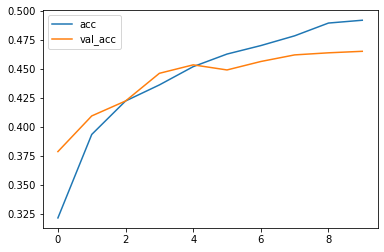

In [67]:
plt.plot(history.history['accuracy'], label="acc")
plt.plot(history.history['val_accuracy'], label="val_acc")
plt.legend()
plt.show()

In [68]:
model.evaluate(xtest, ytest_1hot)

313/313 [==============================] - 1s 3ms/step - loss: 1.5062 - accuracy: 0.4695


[1.5061640739440918, 0.46950000524520874]

Add your comments here

In [ ]:
# Comparison between the two NN above:
# The outcome of accuracy for the second NN with double the hidden layers ended up being the exact same. this means no information was gained from the added hidden layers i added. this could be due to the
# hidden layers being added the way they are however i am unsure. I would play with the learning 